# **Python Script For Getting Judgement Information in CSV File & Downloading Judgement PDFs**

---

<br><br>

### **Problem Statement :-**

You need to write python script to automatically download judgments pdfs from Rajasthan High Court (https://hcraj.nic.in/cishcraj-jdp/JudgementFilters/) along with the displayed information in the table from last 10 days, incrementally daily(explained below).


The only input you need to give is "From Date", "To Date", "Reportable Judgment" and Captcha. In our case From Date will be 10 days earlier from today, and To Date will be today, set Reportable Judgment to YES.

<br>

### **Required Output :-**

* Download all the PDF files.

* A CSV file along with all the relevant information displayed on the website with the pdf name column which refers to the downloaded pdf judgments for a particular row.



<br>

## **Programmer Details :-**
---

<br>

**Name :** &nbsp; Shahzada Moon

**Education-1 :** &nbsp; B.S. (Data Science) &nbsp; - &nbsp; [Diploma Level] &nbsp; - &nbsp; From Indian Institute of Technology Madras, Chennai, Tamil Nadu

**Education-2 :** &nbsp; B.Tech. (Computer Science & Engineering) &nbsp; - &nbsp; [3rd Year] &nbsp; - &nbsp; From R.D. Engineering College, Ghaziabad, Uttar Pradesh

**Contact Number :** &nbsp; +91 9997745651, &nbsp; +91 8126524809

**Contact Email :** &nbsp; 23f2002668@ds.study.iitm.ac.in , &nbsp; pari141994@gmail.com

<br>

<br><br>

## **Python - Script**

In [ ]:

# Installing Playwright Framework For Web - Testing & Automation

!apt-get update
!pip install playwright
!playwright install chromium


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://cli.github.com/packages stable/main amd64 Packages [346 B]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,006 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ub

In [ ]:

# Importing Required Libraries & Modules

from google.colab import sheets
from bs4 import BeautifulSoup as bs
from datetime import datetime, timedelta
from IPython.display import Image, display
from playwright.async_api import async_playwright as asp
import os, time, subprocess, requests, base64 as b64, pandas as pd



Starting . . .


Start Date : 04/09/2025
End Date : 14/09/2025



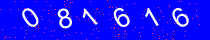



PDF-1 Downloaded : Judgements_PDFs/201400000092011_18_2011.pdf
PDF-2 Downloaded : Judgements_PDFs/201400000542023_4_2023.pdf
PDF-3 Downloaded : Judgements_PDFs/201400000942024_7_2024.pdf
PDF-4 Downloaded : Judgements_PDFs/201400000602025_1_2025.pdf
PDF-5 Downloaded : Judgements_PDFs/201600002342010_4_2010.pdf
PDF-6 Downloaded : Judgements_PDFs/201600001362011_2_2011.pdf
PDF-7 Downloaded : Judgements_PDFs/201600001402023_4_2023.pdf
PDF-8 Downloaded : Judgements_PDFs/201600003712023_9_2023.pdf
PDF-9 Downloaded : Judgements_PDFs/201600003712023_8_2023.pdf
PDF-10 Downloaded : Judgements_PDFs/201600003712023_7_2023.pdf
PDF-11 Downloaded : Judgements_PDFs/201600003582025_2_2025.pdf
PDF-12 Downloaded : Judgements_PDFs/201600003582025_1_2025.pdf
PDF-13 Downloaded : Judgements_PDFs/201600005802025_5_2025.pdf
PDF-14 Downloaded : Judgements_PDFs/201600008472025_2_2025.pdf
PDF-15 Downloaded : Judgements_PDFs/201600008652025_3_2025.pdf
PDF-16 Downloaded : Judgements_PDFs/201600009482025_1_2025.pd

In [ ]:

# Function for getting CSV and PDF files of judgements

async def get_judments():
    print("\nStarting . . .\n")
    url = "https://hcraj.nic.in/cishcraj-jdp/JudgementFilters/"
    headers = {"User-Agent": "Mozilla/5.0"}

    response = requests.get(url=url, headers=headers)
    response = bs(response.text, "html.parser")



    # Get the Base64 Image URL

    async with asp() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        await page.goto(url, wait_until="networkidle")

        await page.wait_for_selector("img#captcha", timeout=10000)

        cap = page.locator("img#captcha")
        cap_b64 = await cap.get_attribute("src")



        # Remove unwanted prefixes to make the image link a perfect Base64 Image file

        if cap_b64:
            for prefix in [
                "data:image/png;base64,",
                "data:image/jpg;base64,",
                "data:image/jpeg;base64,",
                "data:image/gif;base64,",
                "data:image/svg;base64,"
            ]:
                cap_b64 = cap_b64.replace(prefix, "")

            img = b64.b64decode(cap_b64)
            with open("captcha.png", 'wb') as f:
                f.write(img)



        # Filling the form for accessing case-data table

        end = datetime.today()
        start = end - timedelta(days=10)
        start = start.strftime("%d/%m/%Y")
        end = end.strftime("%d/%m/%Y")

        print(f"\nStart Date : {start}")
        await page.fill("#partyFromDate", start)
        print(f"End Date : {end}\n")
        await page.fill("#partyToDate", end)
        await page.check('input[name="rpjudge"][value="A"]')
        display(Image("captcha.png"))
        captcha = input("\nEnter captcha : ")
        os.remove("captcha.png")
        print("\n")
        await page.fill('input[name="txtCaptcha"]', captcha)
        await page.click("button[type='submit'][id='btncasedetail1_1']")



        # Wait while the case-data table is loading and select the entire table

        await page.wait_for_selector("#sample_1", timeout=30000)
        await page.select_option("select[name='sample_1_length']", "-1")
        await page.wait_for_selector("#sample_1 tbody tr")
        html = await page.content()
        soup = bs(html, "html.parser")
        rows = soup.select("#sample_1 tbody tr")



        # Create a Judgements_CSV and Judgements_PDFs directories for saving CSV and PDF files

        os.makedirs("Judgements_CSV", exist_ok=True)
        os.makedirs("Judgements_PDFs", exist_ok=True)
        with open("Judgements_CSV/Judgements.csv", "a") as f :
            f.write(f"Sr. No, Case Details, Hon'ble Justice, Order/Judgement Date, PDF Name (With Address)\n")

            count = 1

            for tr in rows:
                cols = []
                for td in tr.find_all("td"):
                    col = td.get_text(strip=True).replace(",", " & ")
                    cols.append(col)

                if not cols:
                    continue

                else :
                    sr_no = cols[0]
                    case_details = cols[1]
                    judge = cols[2]
                    date = cols[3]



                    # Get download button information

                    download_btn = tr.select_one("button[onclick*=\"DownloadOrdJud(this,'D')\"][data-ftype='PDF']")
                    if download_btn:
                        caseno = download_btn["data-caseno"]
                        orderno = download_btn["data-orderno"]
                        cyear = download_btn["data-cyear"]
                        ftype = download_btn["data-ftype"]



                        # Check if PDF file already exists and if not then download it

                        file = f"Judgements_PDFs/{caseno}_{orderno}_{cyear}.pdf"

                        if os.path.isfile(file):
                            flag = True
                        else:
                            flag = False

                        if flag :
                            print(f"PDF-{count} : Already Downloaded")

                        else :
                            try :
                                async with page.expect_download() as download_info:
                                    await page.click(f"button[type='button'][onclick*=\"DownloadOrdJud(this,'D')\"][data-caseno='{caseno}'][data-orderno='{orderno}'][data-cyear='{cyear}'][data-ftype='{ftype}']")
                                    download = await download_info.value
                                    download_path = f"Judgements_PDFs/{caseno}_{orderno}_{cyear}.pdf"
                                    await download.save_as(download_path)
                                    f.write(f"{sr_no}, {case_details}, {judge}, {date}, {download_path}\n")
                                    print(f"PDF-{count} Downloaded : {download_path}")
                                    count += 1

                            except :
                                print(f"PDF-{count} : Download Failed")


    print("\nMessage : All PDFs has been successfully downloaded at `Judgement_PDFs` folder.\n")
    print("*"*79 + "\n\n\n")



    # Showing CSV file in Google Docs

    print("Message : Please wait for 5 seconds and verify your credentials on Google Colaboratory to view the Judgemnts.csv in Google Spreadsheet.\n\n")
    time.sleep(5)
    df = pd.read_csv("Judgements_CSV/Judgements.csv")
    sheet = sheets.InteractiveSheet(df=df)



await get_judments()


<br><br>

**Note :** I can make a captcha solver but using AI.

<br>

**Thankyou and have a nice day !**
<br><br>

### *********************************************** **Finished** ***********************************************